<a href="https://colab.research.google.com/github/emilyjiminroh/2022_ai_winter_study/blob/main/chapter_9/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95_%EC%A0%81%EC%9A%A9%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [1]:
import pandas as pd 
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() # x1, x2, x3...
fish_target = fish['Species'].to_numpy() # y 

In [2]:
fish.sample(5)

Species  Weight  Length  Diagonal   Height   Width
1     Bream   290.0    26.3      31.2  12.4800  4.3056
127   Perch  1000.0    44.0      46.6  12.4888  7.5958
19    Bream   650.0    33.5      38.7  14.4738  5.7276
21    Bream   685.0    34.0      39.2  15.9936  5.3704
16    Bream   700.0    33.0      38.3  14.8604  5.2854

# test, train 데이터 구분

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42) 
# size=0.25 (default값)
# random_state : 랜덤함수의 시드값 고정

# 데이터 전처리

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 스케일러 종류
- StandardScaler (확률분포)
- MinMaxScaler (0 ~ 1)
- MaxAbsScaler (-1 ~ 1)
- RobustScaler (아웃라이어 영향 최소화)
- [More info](https://mkjjo.github.io/python/2019/01/10/scaler.html)

# SGDClassifier 모델 학습
- 확률적 경사하강법을 사용한 분류 모델
- SGDRegressor (회귀모델)

In [5]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
# loss == 손실함수
# max_iter == epochs

sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [6]:
# 에포크 횟수 1회 추가
sc.partial_fit(train_scaled, train_target)
# 호출할때 마다 epoch += 1
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.8151260504201681
0.825


# 최적의 epoch 횟수 찾기






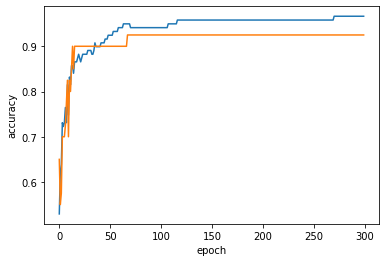

In [7]:
import numpy as np 
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target) # 교집합 Species

for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt 
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


In [8]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
# tol = 중지기준 (loss > best_loss - tol), default=1e-3
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


# Other Optimizer

In [9]:
from keras import optimizers
# SGD, Momentum, Adgarad, Adam, etc

In [10]:
if __name__ == '__main__':
  pass